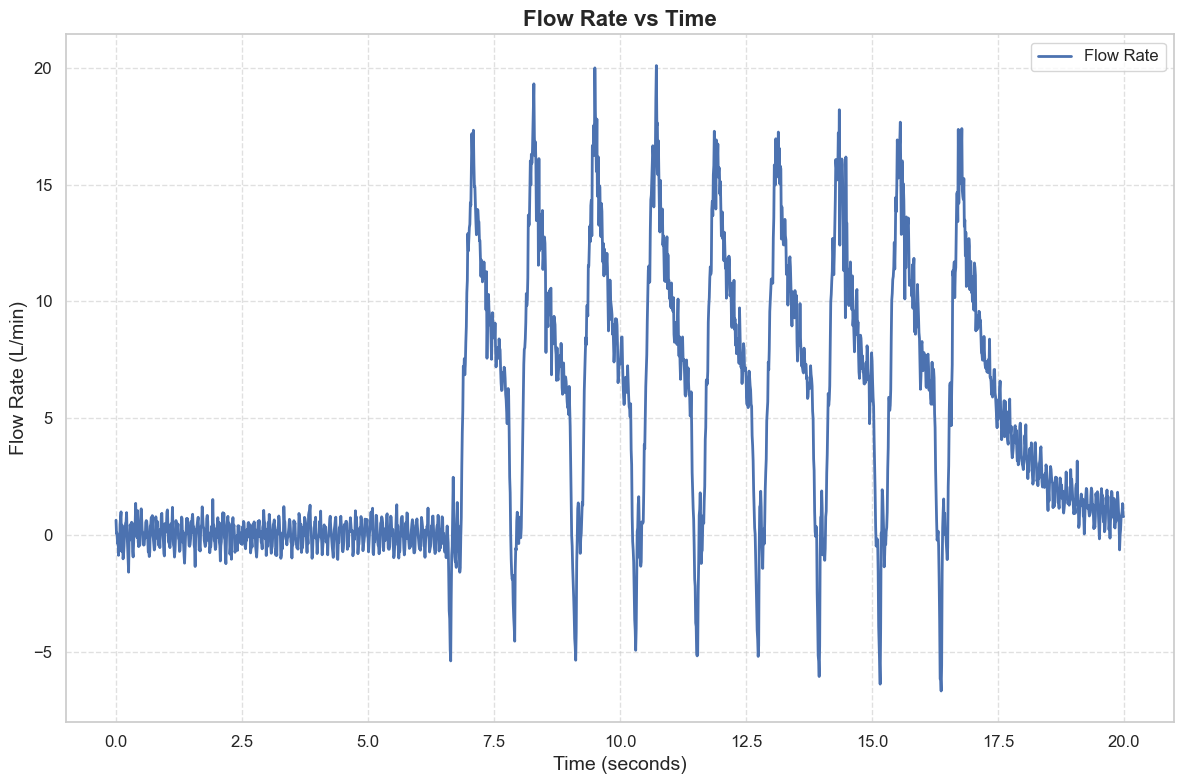

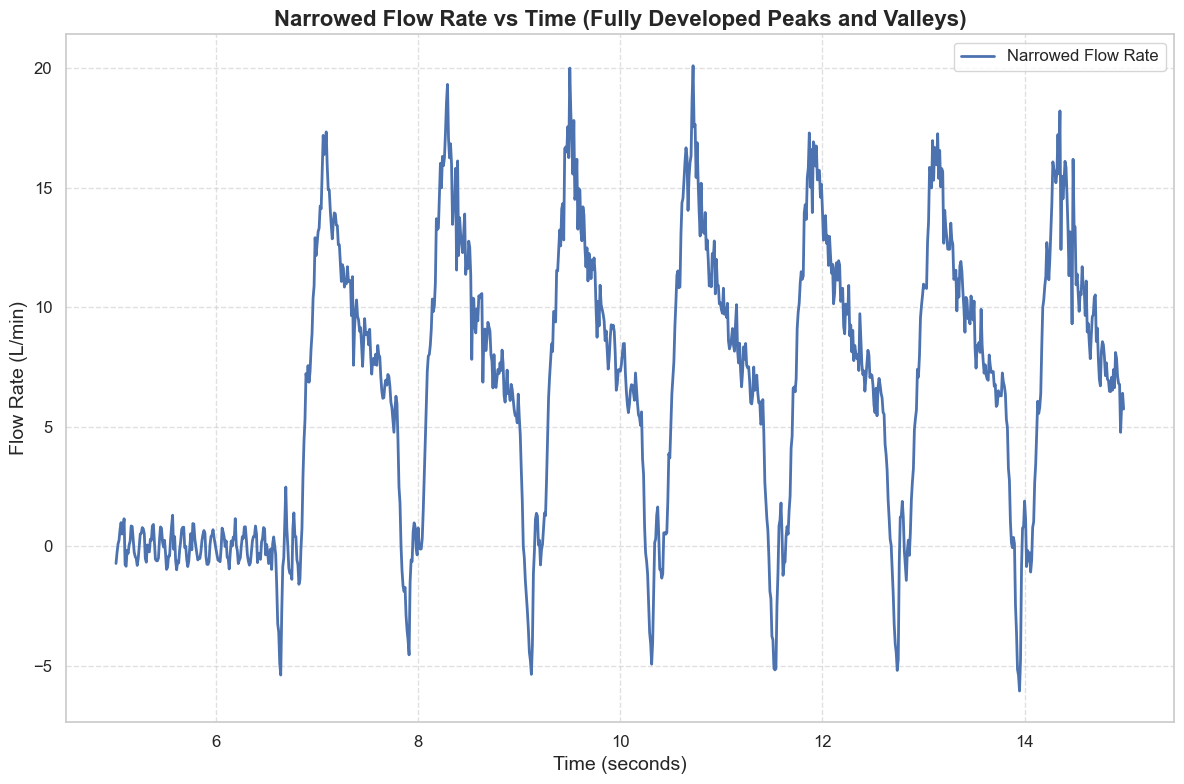

|   Time (seconds) |   Flow Rate (L/min) |
|-----------------:|--------------------:|
|             9.15 |          -0.214062  |
|             9.16 |           1.11875   |
|             9.17 |           1.37187   |
|             9.18 |           1.25469   |
|             9.19 |           0.046875  |
|             9.2  |           0.24375   |
|             9.21 |          -0.789062  |
|             9.22 |          -0.159375  |
|             9.23 |           0.0703125 |
|             9.24 |           0.7375    |
|             9.25 |           1.3875    |
|             9.26 |           1.27656   |
|             9.27 |           2.75469   |
|             9.28 |           4.47031   |
|             9.29 |           6.18594   |
|             9.3  |           7.05938   |
|             9.31 |           7.77031   |
|             9.32 |           8.4625    |
|             9.33 |           8.14219   |
|             9.34 |           9.81563   |
|             9.35 |           9.81406   |
|          

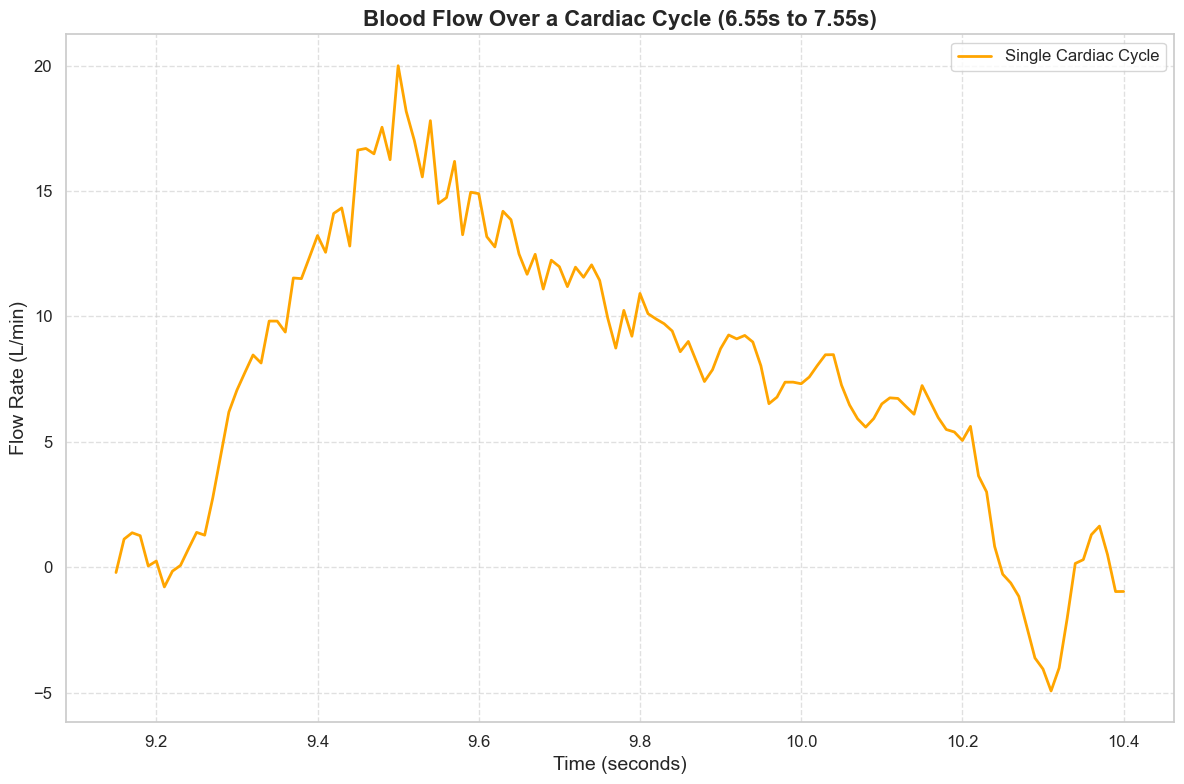

Estimated Stroke Volume: 161.92 mL


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy.integrate import simpson

def plot_data_from_csv(file_path):
    # Set Seaborn style for nicer plots
    sns.set(style="whitegrid")
    
    # Read CSV file using pandas
    data = pd.read_csv(file_path)
    
    # Convert columns to numeric, forcing errors to NaN
    data['Time'] = pd.to_numeric(data['Time'], errors='coerce')
    data['Flow'] = pd.to_numeric(data['Flow'], errors='coerce')
    
    # Drop rows with NaN values
    data = data.dropna()

    # Plot the original data using Matplotlib
    plt.figure(figsize=(12, 8))
    plt.plot(data['Time'], data['Flow'], label='Flow Rate', color='b', linewidth=2)
    
    # Labeling the axes
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('Flow Rate (L/min)', fontsize=14)
    plt.title('Flow Rate vs Time', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Show the original plot
    plt.tight_layout()
    plt.show()

    # Focus on the middle portion of the data to find fully developed peaks and valleys
    middle_start = len(data) // 4
    middle_end = 3 * len(data) // 4
    middle_data = data.iloc[middle_start:middle_end]

    # Find peaks and valleys (negative peaks) in the middle section
    peaks, _ = find_peaks(middle_data['Flow'])
    valleys, _ = find_peaks(-middle_data['Flow'])
    
    # Get the indices that make up the full peaks and valleys
    peak_valley_indices = sorted(peaks.tolist() + valleys.tolist())
    narrowed_data = middle_data.iloc[min(peak_valley_indices):max(peak_valley_indices) + 1]

    # Plot the narrowed data with the same style as the original using Matplotlib
    plt.figure(figsize=(12, 8))
    plt.plot(narrowed_data['Time'], narrowed_data['Flow'], label='Narrowed Flow Rate', color='b', linewidth=2)
    
    # Labeling the axes
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('Flow Rate (L/min)', fontsize=14)
    plt.title('Narrowed Flow Rate vs Time (Fully Developed Peaks and Valleys)', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Show the narrowed plot
    plt.tight_layout()
    plt.show()

    # Plot a specific segment of the data from 6.55 seconds to 7.55 seconds using Matplotlib
    segment_data = data[(data['Time'] >= 9.15) & (data['Time'] <= 10.4)]
    # Print a markdown table with all the x and y values used to make the third graph
    segment_data_table = pd.DataFrame({'Time (seconds)': segment_data['Time'], 'Flow Rate (L/min)': segment_data['Flow']})
    print(segment_data_table.to_markdown(index=False))

    plt.figure(figsize=(12, 8))
    plt.plot(segment_data['Time'], segment_data['Flow'], label='Single Cardiac Cycle', color='orange', linewidth=2)
    
    # Labeling the axes
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('Flow Rate (L/min)', fontsize=14)
    plt.title('Blood Flow Over a Cardiac Cycle (6.55s to 7.55s)', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Show the single cardiac cycle plot
    plt.tight_layout()
    plt.show()

    # Integrate the flow rate over time to calculate the stroke volume for the selected cycle
    segment_data_flow_rate_per_second = segment_data['Flow'] / 60  # Convert L/min to L/s
    stroke_volume = simpson(segment_data_flow_rate_per_second, x=segment_data['Time'])
    stroke_volume_ml = stroke_volume * 1000  # Convert L to mL
    print(f"Estimated Stroke Volume: {stroke_volume_ml:.2f} mL")

# Example usage
# plot_data_from_csv('path/to/your/data.csv')


#Example usage
plot_data_from_csv('C:/Users/dasar/OneDrive/Desktop/Programing/Heart Valve Sound Analysis/MCL_TGT Flow Analysis/TGT Data to Use/downsampled_V5_Hr0_bloodflow.csv')
